## Obtención de los datos
Procedemos a crear una conexión con la base de datos y cargar los dataframes 

In [97]:
import os
from dotenv import load_dotenv
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
load_dotenv('./config/.env')

def generate_histogram(df, column, bins, xsize, ysize, xlabel, ylabel, grid, title, color):
    """Generate a histogram from a Pandas DataFrame"""
    plt.figure(figsize=(xsize, ysize))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(grid)
    plt.hist(df[column], bins=bins, color=color)    
    plt.show()

def generate_box_plot(df, column, xlabel, width, title, color):
    """Generate a box plot from a Pandas DataFrame and print outliers"""
    plt.figure(figsize=(width, 5))
    plt.title(title)
    plt.xlabel(xlabel)
    # Utilizar seaborn para un mejor estilo y manejo de outliers
    sns.boxplot(x=df[column], color=color, showfliers=True)  # Mostrar los outliers
    
    # Identificar y imprimir valores de outliers
    outliers = df[df[column] > df[column].quantile(0.75) + 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25))]
    print(f'Outliers en {column}: {outliers[column].tolist()}')
    
    # Agregar líneas para indicar percentiles (opcional)
    plt.axvline(df[column].median(), color='red', linestyle='dashed', linewidth=2, label='Mediana')
    plt.axvline(df[column].quantile(0.25), color='green', linestyle='dashed', linewidth=2, label='Cuartil 1')
    plt.axvline(df[column].quantile(0.75), color='blue', linestyle='dashed', linewidth=2, label='Cuartil 3')
    
    plt.legend()  # Mostrar la leyenda
    plt.grid(True)
    plt.show()

def univariate_analysis(df, column, width, height, title, color):
    """
    Generate a bar plot for a single variable (municipios or departamentos) from a Pandas DataFrame.

    Parameters:
    - df: DataFrame
    - column: str, nombre de la columna para el análisis (municipios o departamentos)
    - width: int, ancho de la figura
    - height: int, altura de la figura
    - title: str, título del gráfico
    - color: str, color de las barras
    """
    plt.figure(figsize=(width, height))
    plt.title(title)

    sns.countplot(x=df[column], color=color)

    plt.xlabel(column)
    plt.ylabel('Número de Registros')
    plt.grid(True)
    
    plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotar etiquetas y ajustar tamaño de fuente
    plt.tight_layout()  # Ajustar diseño para evitar recorte de etiquetas
    plt.show()

def generate_bar_plot(df, x_column, y_column, width, grid, title, color):
    """
    Generate a bar plot from a Pandas DataFrame.

    Parameters:
    - df: DataFrame
    - x_column: str, nombre de la columna en el eje x
    - y_column: str, nombre de la columna en el eje y
    - width: int, ancho de la figura
    - title: str, título del gráfico
    - color: str, color de las barras
    - grid: bool, si se muestra la grilla
    """
    plt.figure(figsize=(width, 5))
    plt.title(title)

    sns.barplot(x=df[x_column], y=df[y_column], color=color)

    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.grid(grid)
    plt.show()

def conectar():
    """Connect to MySQL database"""
    return mysql.connector.connect(
        host=os.getenv('DB_HOST', 'localhost'),
        user=os.getenv('DB_USER', 'root'),
        password=os.getenv('DB_PASSWORD', 'admin'),
        database=os.getenv('DB_NAME', 'etl_dataset')
    )

def load_tables(query):
    """Load data from MySQL database into a Pandas DataFrame"""
    conexion = None
    cursor = None    
    try:
        conexion = conectar()
        cursor = conexion.cursor()
        cursor.execute(query)
        # Get all headers
        columns = [column[0] for column in cursor.description]

        # Get all rows
        rows = cursor.fetchall()

        # return the DataFrame
        df = pd.DataFrame(rows, columns=columns)
        print(f"Datos obtenidos correctamente \n {query}")
        print(f"Registros obtenidos: {len(df)}\n")
        return df
    except mysql.connector.Error as error:
        print("Error al obtener los datos de la tabla {}".format(error))
        return None
    finally:
        if cursor:
            cursor.close()
        if conexion:
            conexion.close()        
print("Conectado a la base de datos\n")

#Datos cuantitativos
queryMonoTown = """SELECT departament, town, population 
    FROM Town t 
    INNER JOIN Departament d 
        ON t.code_departament = d.code_departament"""
querMonoCovidCases = """SELECT date_reported, new_deaths_f2 as new_deaths, cumulative_deaths_f2 as cumulative_deaths 
    FROM CovidCases"""

dfMonoTown = load_tables(queryMonoTown)
dfCovidCases = load_tables(querMonoCovidCases)

#Datos cualitativos
queryQualityTown = "SELECT * FROM Town"
queryQualityDepartament = "SELECT * FROM Departament"

dfTown = load_tables(queryQualityTown)
dfDepartament = load_tables(queryQualityDepartament)

Conectado a la base de datos

Datos obtenidos correctamente 
 SELECT departament, town, population 
    FROM Town t 
    INNER JOIN Departament d 
        ON t.code_departament = d.code_departament
Registros obtenidos: 339

Datos obtenidos correctamente 
 SELECT date_reported, new_deaths_f2 as new_deaths, cumulative_deaths_f2 as cumulative_deaths 
    FROM CovidCases
Registros obtenidos: 1464

Datos obtenidos correctamente 
 SELECT * FROM Town
Registros obtenidos: 339

Datos obtenidos correctamente 
 SELECT * FROM Departament
Registros obtenidos: 22



## EDA Mono Variable

#### Análisis Datos Cuantitativos
- Análisis mono variable de la cantidad de nuevas muertes, cantidad de muertes acumuladas y población de los municipios. 
- Mostrar estadístico de conteo, valores únicos, promedio, desviación estándar, mínimo, máximo y cuartiles.
- Realizar un histograma y un diagrama d ecaja con cada una de las variables mencionadas anteriormente.

#### Análisis de la variable nuevas muertes
- La variable usada se llama new_deaths
- Se encontraron 1464 registros
- El promedio de los valores es de 18.820355
- La desviación estándar de 14.474994
- El valor mínimo es 0
- El valor máximo es 61
- El valor más encontrado del cuartil 25% es 7
- El valor más encontrado del cuartil 50% es 16
- El valor más encontrado del cuartil 75% es 27.25
- Valores únicos fueron 53
- El IQR se encuentra aproximadamente entre 7 y 28
- Outliers de 58, 59 y 61

VARIABLE new_deaths (nuevas muertes)
Estadísticas de la variable
count    1464.000000
mean       18.820355
std        14.474994
min         0.000000
25%         7.000000
50%        16.000000
75%        27.250000
max        61.000000
Name: new_deaths, dtype: float64
Valores únicos de la variable 53
61, 59, 58, 57, 54, 53, 49, 48, 47, 45, 44, 42, 41, 40, 39, 38, 37, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0


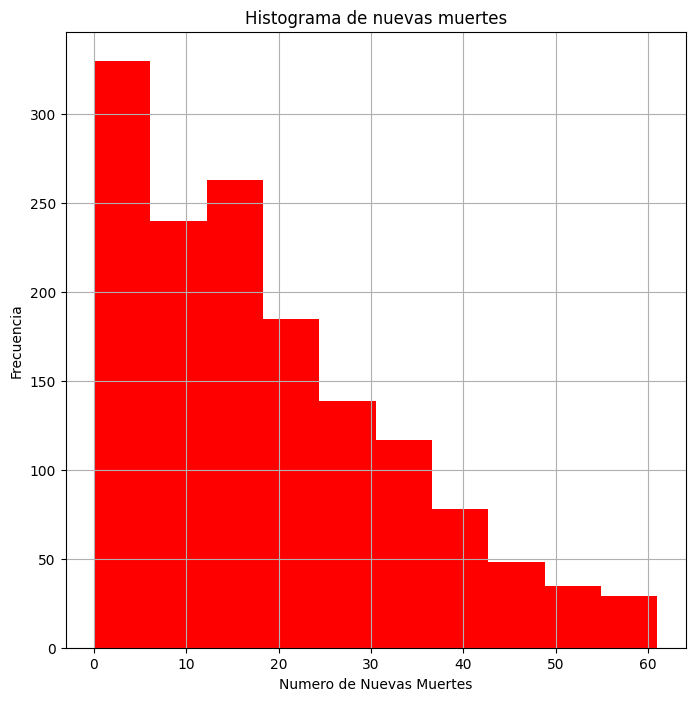

Outliers en new_deaths: [58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 59, 59, 59, 59, 59, 59, 61, 61, 61, 61, 61, 61]


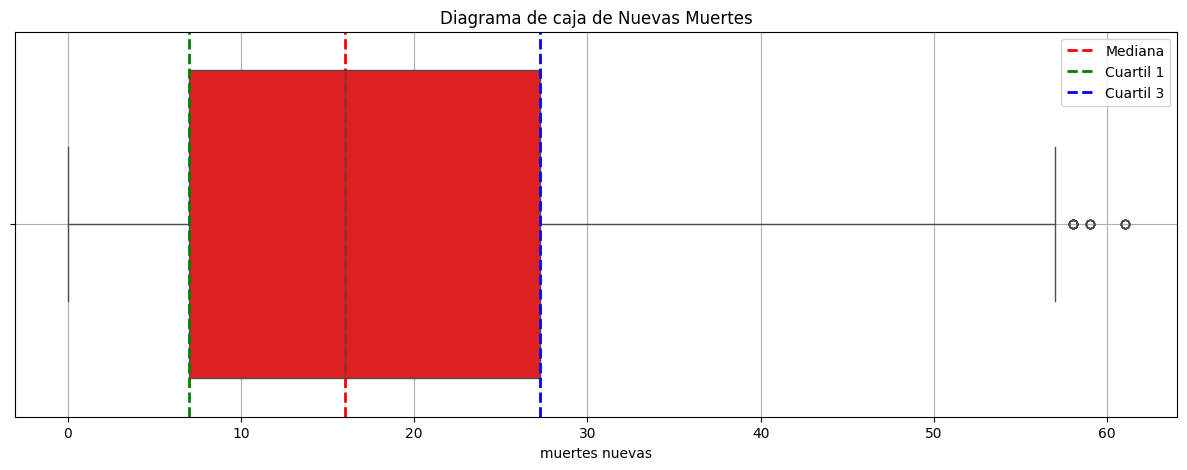

In [72]:
#Obteniendo estadísticas de las variables y valores unicos ordenados forma descendente
stats_new_deaths = dfCovidCases['new_deaths'].describe()
unique_new_deaths = sorted(dfCovidCases['new_deaths'].unique(), reverse=True)
# Imprimiendo estadisticas de las variables
print("VARIABLE new_deaths (nuevas muertes)")
print("Estadísticas de la variable")
print(stats_new_deaths)
print(f"Valores únicos de la variable {len(unique_new_deaths)}")
print(', '.join(map(str, unique_new_deaths)))
generate_histogram(dfCovidCases, 'new_deaths', 10, 8, 8,"Numero de Nuevas Muertes", "Frecuencia",
                    True, 'Histograma de nuevas muertes', 'red')
generate_box_plot(dfCovidCases, 'new_deaths','muertes nuevas', 15, 'Diagrama de caja de Nuevas Muertes', 'red')

#### Análisis de la variable muertes acumuladas
- La variable usada se llama cumulative_deaths
- Se encontraron 1464 registros
- El promedio de los valores es de 2275.53
- La desviación estándar de 1596.242666
- El valor mínimo es 0
- El valor máximo es 4803
- El valor más encontrado del cuartil 25% es 531
- El valor más encontrado del cuartil 50% es 2630
- El valor más encontrado del cuartil 75% es 3682
- Valores únicos fueron 53
- El IQR se encuentra aproximadamente entre mayor a 500 y 37000
- No se detectaron outilers

Estadísticas de la variable
count    1464.000000
mean     2275.528689
std      1596.242666
min         0.000000
25%       531.000000
50%      2630.000000
75%      3682.000000
max      4803.000000
Name: cumulative_deaths, dtype: float64
Valores únicos de la variable 53
4803, 4781, 4773, 4768, 4763, 4757, 4749, 4739, 4718, 4688, 4656, 4624, 4589, 4551, 4510, 4476, 4445, 4423, 4405, 4376, 4345, 4311, 4286, 4274, 4250, 4239, 4224, 4209, 4191, 4178, 4171, 4166, 4161, 4141, 4133, 4107, 4099, 4092, 4076, 4074, 4067, 4050, 4008, 3947, 3938, 3932, 3920, 3880, 3858, 3845, 3832, 3823, 3821, 3811, 3794, 3766, 3752, 3748, 3738, 3729, 3714, 3704, 3682, 3665, 3651, 3644, 3609, 3594, 3580, 3567, 3546, 3541, 3530, 3515, 3478, 3453, 3430, 3410, 3387, 3384, 3365, 3356, 3347, 3335, 3310, 3302, 3293, 3285, 3267, 3261, 3246, 3238, 3234, 3229, 3213, 3186, 3170, 3154, 3137, 3124, 3119, 3105, 3076, 3036, 3009, 2984, 2972, 2957, 2949, 2929, 2918, 2897, 2890, 2862, 2852, 2845, 2825, 2804, 2790, 2778, 2760, 2740,

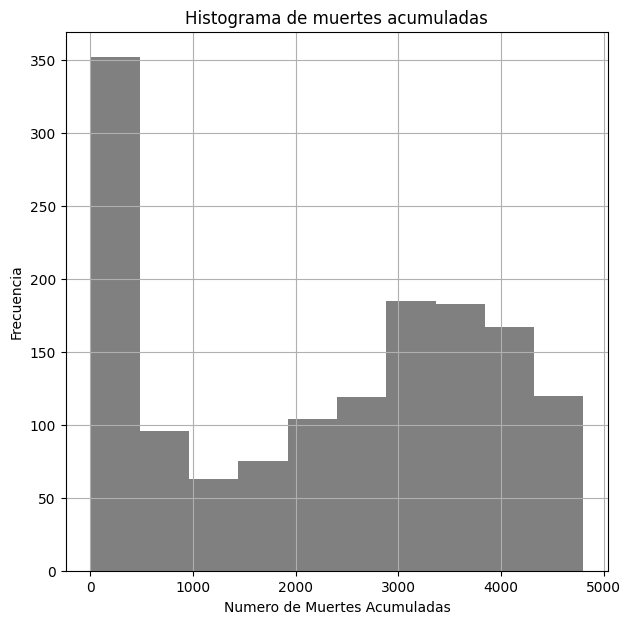

Outliers en cumulative_deaths: []


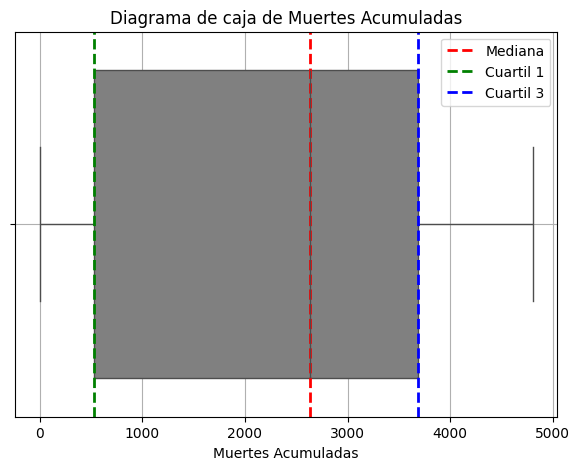

In [73]:
stats_cumulative_deaths = dfCovidCases['cumulative_deaths'].describe()
unique_cumulative_deaths = sorted(dfCovidCases['cumulative_deaths'].unique(), reverse=True)

print("Estadísticas de la variable")
print(stats_cumulative_deaths)
print(f"Valores únicos de la variable {len(unique_new_deaths)}")
print(', '.join(map(str, unique_cumulative_deaths)))
generate_histogram(dfCovidCases, 'cumulative_deaths', 10, 7, 7,"Numero de Muertes Acumuladas","Frecuencia", True, 'Histograma de muertes acumuladas', 'gray')
generate_box_plot(dfCovidCases, 'cumulative_deaths', 'Muertes Acumuladas', 7, 'Diagrama de caja de Muertes Acumuladas', 'gray')

#### Análisis de la variable población
- La variable usada se llama population
- Debido a la desproporción de los datos se aplico el log(1+x) a los datos para eliminar ceros y ajustar escalas
- Se encontraron 339 registros
- El promedio de los valores es de 4,9978.85
- La desviación estándar de 8,1343.45
- El valor mínimo es 2,563
- El valor máximo es 1,205,668
- El valor más encontrado del cuartil 25% es 17,517
- El valor más encontrado del cuartil 50% es 30,973
- El valor más encontrado del cuartil 75% es 59,011
- Valores únicos fueron 53
- El IQR se encuentra aproximadamente entre mayor a 500 y 37000
- Se encontraron numerosos outliers

Estadísticas de la variable
count    3.390000e+02
mean     4.997885e+04
std      8.134345e+04
min      2.563000e+03
25%      1.751700e+04
50%      3.097300e+04
75%      5.901100e+04
max      1.205668e+06
Name: population, dtype: float64
Valores únicos de la variable 53
1205668, 494561, 464528, 276836, 248880, 224109, 196867, 188522, 166078, 165026, 163665, 148943, 147604, 145417, 136909, 129232, 123979, 122466, 121721, 117579, 117483, 117014, 112778, 109753, 108893, 108405, 108134, 107265, 106156, 104861, 104428, 98886, 97974, 97296, 97003, 92103, 91954, 91523, 87912, 86150, 84350, 83448, 83375, 82876, 81385, 81005, 80234, 79867, 79777, 79360, 79308, 76128, 76047, 76020, 75979, 73811, 73093, 72955, 70118, 70066, 69560, 69107, 67994, 66883, 66314, 65730, 65594, 65178, 64441, 64292, 64224, 63897, 63841, 62895, 62329, 61664, 61547, 60848, 60791, 60376, 60355, 60200, 59788, 59496, 58526, 58338, 58174, 57977, 57277, 55723, 55290, 55133, 54845, 54623, 54588, 54382, 52439, 51975, 51770, 51299

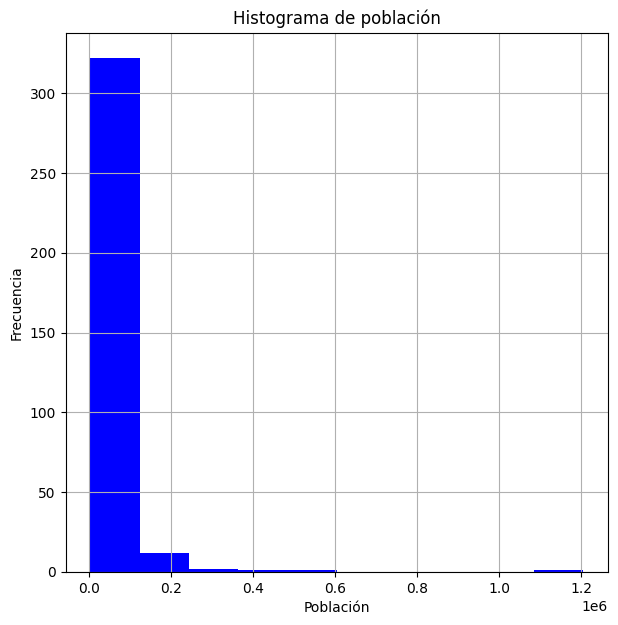

Outliers en population: [1205668, 121721, 494561, 276836, 147604, 464528, 165026, 145417, 129232, 122466, 148943, 224109, 248880, 188522, 163665, 166078, 123979, 136909, 196867]


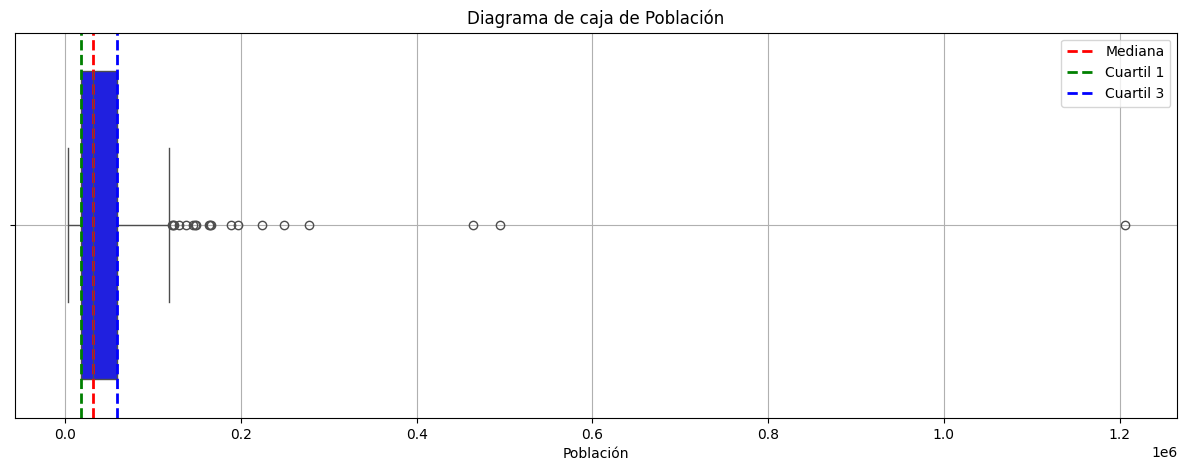

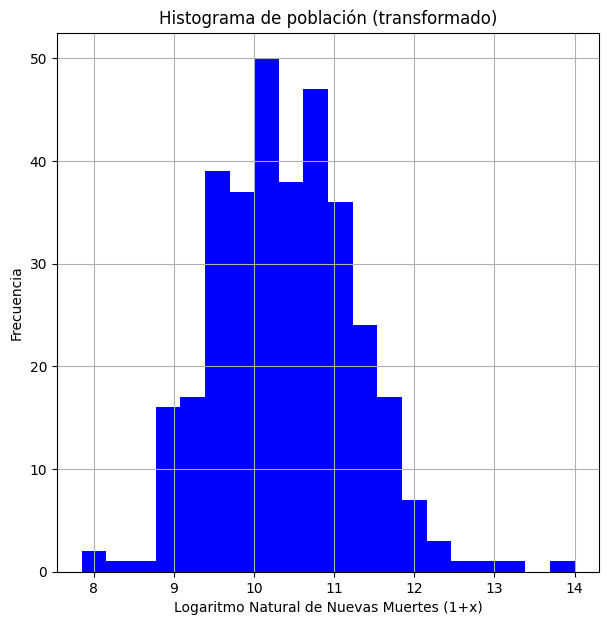

Outliers en population_log: [14.002545157569754, 13.111427801356472, 13.048779268010547]


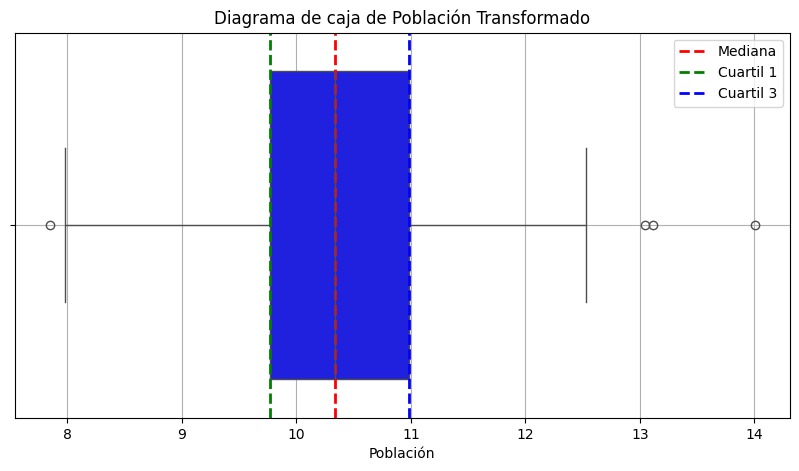

In [74]:
stats_population = dfMonoTown['population'].describe()
unique_population = sorted(dfMonoTown['population'].unique(), reverse=True)

print("Estadísticas de la variable")
print(stats_population)
print(f"Valores únicos de la variable {len(unique_new_deaths)}")
print(', '.join(map(str, unique_population)))
#Aplicar una transformación logarítmica a la variable population log(1+x)
dfMonoTown['population_log'] = np.log1p(dfMonoTown['population'])
generate_histogram(dfMonoTown, 'population', 10, 7, 7,"Población", "Frecuencia", True, 'Histograma de población', 'blue')
generate_box_plot(dfMonoTown, 'population', 'Población', 15, 'Diagrama de caja de Población', 'blue')
generate_histogram(dfMonoTown, 'population_log', 20, 7, 7,"Logaritmo Natural de Nuevas Muertes (1+x)", "Frecuencia", True, 'Histograma de población (transformado)', 'blue')
generate_box_plot(dfMonoTown, 'population_log', 'Población', 10, 'Diagrama de caja de Población Transformado', 'blue')

#### Análisis de Datos Cualitativos
Diagrama de barras de los departamentos y municipios
- Hay 339 registros en los municipios y 22 registros en los departamentos.
- Los municipios que más veces aparecieron fue Santa Barbara y La democracia con una frecuencia de 3 respectivamente.
- Hay 22 departamentos en total

Diagrama de barras de los municipios con 339 registros


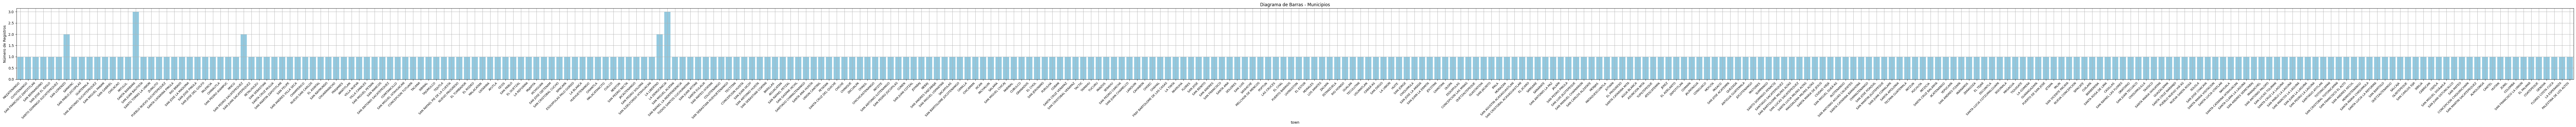

Diagrama de barras de los departamentos con 22 registros


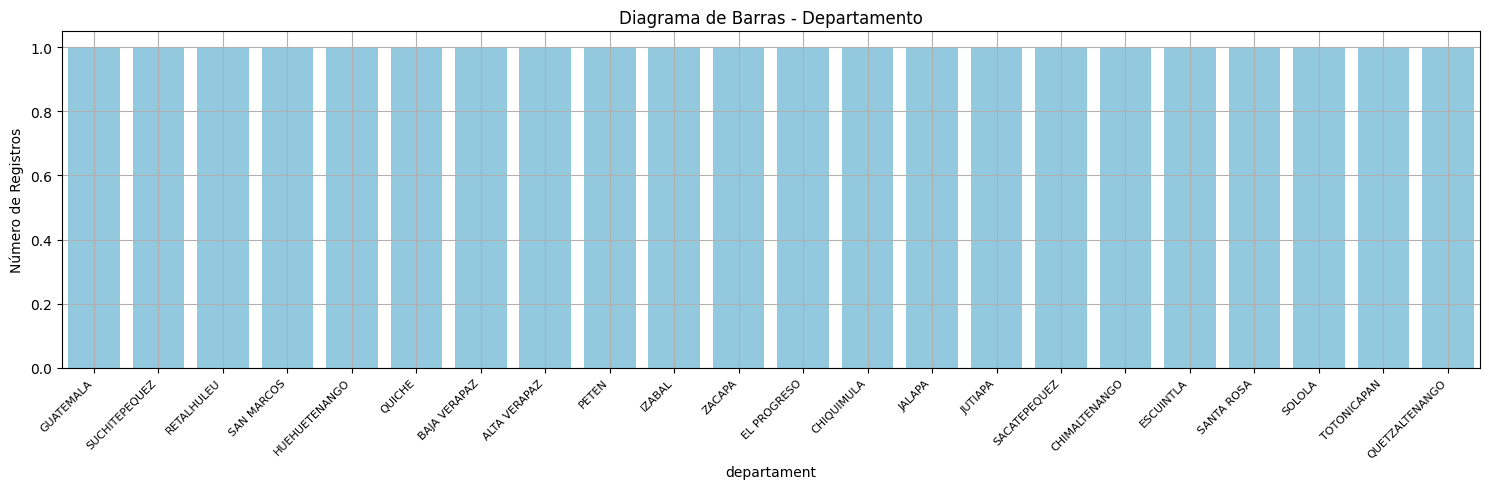

In [103]:
print(f"Diagrama de barras de los municipios con {len(dfTown)} registros")
univariate_analysis(dfTown, 'town', width=100, height=5, title='Diagrama de Barras - Municipios', color='skyblue')

print(f"Diagrama de barras de los departamentos con {len(dfDepartament)} registros")
univariate_analysis(dfDepartament, 'departament', width=15, height=5, title='Diagrama de Barras - Departamento', color='skyblue')
